In [31]:
# Code used for Fractional Score Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%store -r cg
%store -r mg


In [32]:
# Defining cg and mg to avoid dozens of 'variable is not defined' warnings
cg = cg
mg = mg


In [33]:
cg.head()

,game_id,game_order,event,white_title,white_rating_diff,white_elo,white,result,black,black_elo,...,eco,termination,time_control,datetime,variant,magnus_result,magnus_color,move_no_pair,player,notation
0,298f0889-0249-4db0-ba19-f6483ec1e6de,105,Lichess Titled Arena,GM,58.0,2500,Magnus Carlsen,1-0,jsalomon,2532,...,E47,Normal,60+0,2017.12.14 21:00:02,Standard,lost,black,1,Magnus Carlsen,d4
1,52d5e7da-22b9-422f-b695-fec4be9bedb1,104,Lichess Titled Arena,IM,17.0,2420,Yoseph Taher,1-0,Magnus Carlsen,2558,...,B01,Time forfeit,60+0,2017.12.14 21:01:10,Standard,lost,black,1,Magnus Carlsen,d5
2,30157fb0-b75e-437c-a426-15de66858bae,103,Lichess Titled Arena,FM,-17.0,2754,gnejs,0-1,Magnus Carlsen,2493,...,B01,Normal,60+0,2017.12.14 21:04:13,Standard,lost,black,1,Magnus Carlsen,d5
3,93fa1904-8b3f-47cb-a3b3-effd45ef270a,102,Lichess Titled Arena,GM,61.0,2566,Magnus Carlsen,1-0,Toivo Keinänen,2755,...,A01,Normal,60+0,2017.12.14 21:06:30,Standard,lost,black,1,Magnus Carlsen,b3
4,5677b65e-8fa4-44a1-a64b-35067160a80c,101,Lichess Titled Arena,GM,9.0,2627,Magnus Carlsen,1-0,AusCub,2275,...,A01,Normal,60+0,2017.12.14 21:07:57,Standard,lost,black,1,Magnus Carlsen,b3


In [34]:
# Converts a number of wins, losses, and ties to a fractional score (fscore)
def fscore(arr):
    return (arr[0] + arr[2]*0.5)/sum(arr)

# Used to shorten my code and reduce a lot of character repitition, vc short for value counts
def vc(df,cond):
    return df[cond].magnus_result.value_counts()

def vco(df): # vco short for value counts overall
    return df.magnus_result.value_counts()


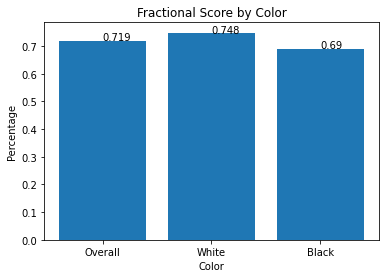

In [35]:
# Significant 5% difference between black and white
x = ['Overall','White','Black']
y = [fscore(vco(cg)),fscore(vc(cg,cg.white=='Magnus Carlsen')),fscore(vc(cg,cg.black=='Magnus Carlsen'))]
plt.bar(x,y)
plt.title('Fractional Score by Color')
plt.xlabel('Color')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

In [36]:
test = cg.datetime.str[0:4]=='2018'
test.value_counts()

False    12106
True      1320
Name: datetime, dtype: int64

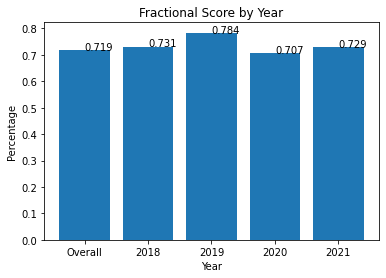

In [37]:
x = ['Overall','2018','2019','2020','2021']
y = [fscore(vco(cg)),fscore(vc(cg,cg.datetime.str[0:4]=='2018')),fscore(vc(cg,cg.datetime.str[0:4]=='2019')),fscore(vc(cg,cg.datetime.str[0:4]=='2020')),fscore(vc(cg,cg.datetime.str[0:4]=='2021'))]
plt.bar(x,y)
plt.title('Fractional Score by Year')
plt.xlabel('Year')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

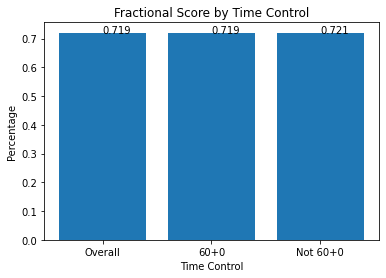

In [38]:
# 85% of games are 60+0, 6% of games are 180+0 and other time controls are even lower, 
x = ['Overall','60+0','Not 60+0']
y = [fscore(vco(cg)),fscore(vc(cg,cg.time_control=='60+0')),fscore(vc(cg,cg.time_control!='60+0'))]
plt.bar(x,y)
plt.title('Fractional Score by Time Control')
plt.xlabel('Time Control')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

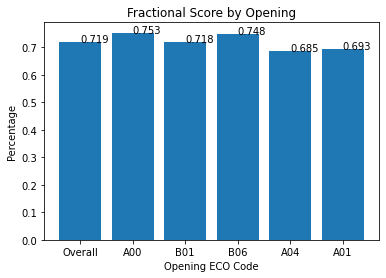

In [39]:
# I think first move might be better but this is a test
x = ['Overall','A00','B01','B06','A04','A01']
y = [fscore(vco(cg)),fscore(cg[cg.eco=='A00'].magnus_result.value_counts()),fscore(cg[cg.eco=='B01'].magnus_result.value_counts()),fscore(cg[cg.eco=='B06'].magnus_result.value_counts()),fscore(cg[cg.eco=='A04'].magnus_result.value_counts()),fscore(cg[cg.eco=='A01'].magnus_result.value_counts())]
plt.bar(x,y)
plt.title('Fractional Score by Opening')
plt.xlabel('Opening ECO Code')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

In [40]:
# e4, d4, d5, Nf6, c5, g6, c4 all have at least 5% frequency (700+ samples) so I'll be grpahing them
cg.notation.value_counts()

e4       2847
d4       1878
d5       1576
Nf6      1371
c5       1004
g6        798
c4        708
e5        578
Nf3       475
c6        291
g3        287
e6        260
d6        250
b3        185
h5        132
f5        122
b6        106
e3         63
Nc3        50
d3         41
h4         39
Nc6        39
f6         38
g5         37
c3         33
g4         33
f3         32
a5         30
f4         25
h6         17
b5         16
b4         11
a4         10
a6          7
Na6         6
Nh6         5
a3          5
Nb6         5
Bb3         2
Ng6         2
Ng3         2
h3          2
Qxf7        2
Bxf7+       1
Ngf6        1
Bc4         1
Rf8         1
O-O         1
Nb3         1
Name: notation, dtype: int64

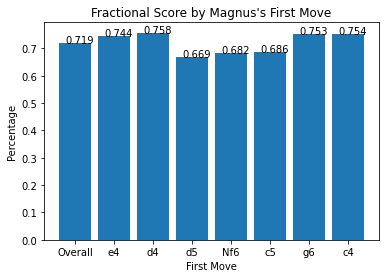

In [41]:
# e4, d4, d5, Nf6, c5, g6, c4 all have at least 5% frequency (700+ samples) so I'll be grpahing them
x = ['Overall','e4','d4','d5','Nf6','c5','g6','c4']
y = [fscore(vco(cg)),fscore(vc(cg,cg.notation=='e4')),
    fscore(vc(cg,cg.notation=='d4')), fscore(vc(cg,cg.notation=='d5')),
    fscore(vc(cg,cg.notation=='Nf6')), fscore(vc(cg,cg.notation=='c5')),
    fscore(vc(cg,cg.notation=='g6')), fscore(vc(cg,cg.notation=='c4'))]
plt.bar(x,y)
plt.title('Fractional Score by Magnus\'s First Move')
plt.xlabel('First Move')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index-0.25, value,
             str(round(value,3)))
plt.show()
# The disparity is mostly due to white winning more, i should seperate by color
# e4 d4 c4 Nf3 for white
# d5 Nf6 c5 g6 for black

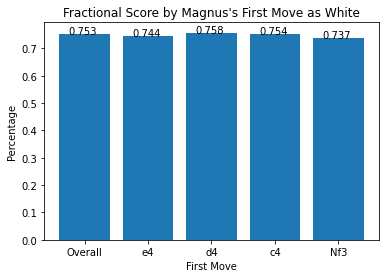

In [45]:
x = ['Overall','e4','d4','c4','Nf3']
y = [fscore(vc(cg,cg.magnus_color=='white')),fscore(vc(cg,cg.notation=='e4')),
    fscore(vc(cg,cg.notation=='d4')),fscore(vc(cg,cg.notation=='c4')),fscore(vc(cg,cg.notation=='Nf3'))]
plt.bar(x,y)
plt.title('Fractional Score by Magnus\'s First Move as White')
plt.xlabel('First Move')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index-0.25, value,
             str(round(value,3)))
plt.show()

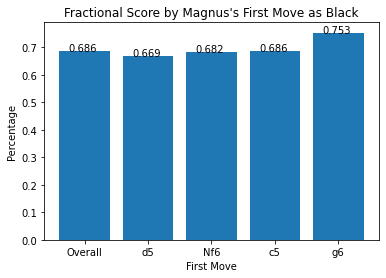

In [46]:
x = ['Overall','d5','Nf6','c5','g6']
y = [fscore(vc(cg,cg.magnus_color=='black')), fscore(vc(cg,cg.notation=='d5')),
    fscore(vc(cg,cg.notation=='Nf6')), fscore(vc(cg,cg.notation=='c5')), fscore(vc(cg,cg.notation=='g6'))]
plt.bar(x,y)
plt.title('Fractional Score by Magnus\'s First Move as Black')
plt.xlabel('First Move')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index-0.25, value,
             str(round(value,3)))
plt.show()

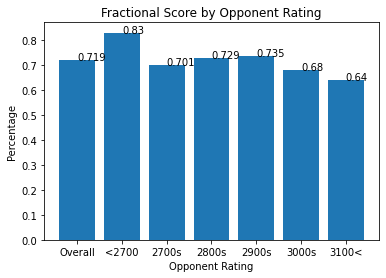

In [42]:
# Each bin has 1600+ games so I'm using these bins.
# x = ['<2700','2700-2800','2800-2900','2900-3000','3000-3100','3100<']
# y = [2141, 1612, 2202, 2488, 3201, 1798]

x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] # Less characters
y = [fscore(vco(cg)),fscore(vc(mg,mg.opp_elo<2700)),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700))),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800))),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900))),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000))),fscore(vc(mg,mg.opp_elo>=3100))]
plt.bar(x,y)
plt.title('Fractional Score by Opponent Rating')
plt.xlabel('Opponent Rating')
plt.ylabel('Percentage')
for index, value in enumerate(y):
    plt.text(index, value,
             str(round(value,3)))
plt.show()

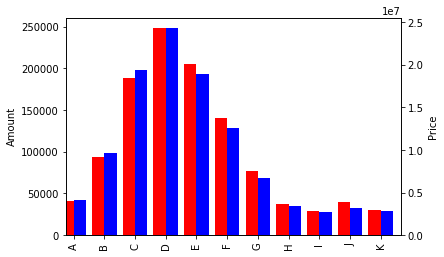

In [47]:
from io import StringIO

s = StringIO("""     amount     price
A     40929   4066443
B     93904   9611272
C    188349  19360005
D    248438  24335536
E    205622  18888604
F    140173  12580900
G     76243   6751731
H     36859   3418329
I     29304   2758928
J     39768   3201269
K     30350   2867059""")

df = pd.read_csv(s, index_col=0, delimiter=' ', skipinitialspace=True)

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

df.amount.plot(kind='bar', color='red', ax=ax, width=width, position=1)
df.price.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Amount')
ax2.set_ylabel('Price')

plt.show()

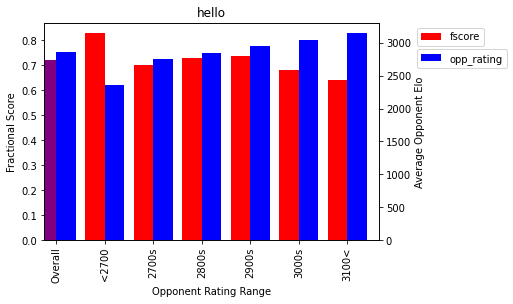

In [131]:

x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] # Less characters
y = [fscore(vco(cg)),fscore(vc(mg,mg.opp_elo<2700)),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700))),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800))),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900))),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000))),fscore(vc(mg,mg.opp_elo>=3100))]
z = [np.mean(mg.opp_elo), np.mean(mg[mg.opp_elo<2700].opp_elo),
    np.mean(mg[(mg.opp_elo<2800) &(mg.opp_elo>=2700)].opp_elo),
    np.mean(mg[(mg.opp_elo<2900) &(mg.opp_elo>=2800)].opp_elo),
    np.mean(mg[(mg.opp_elo<3000) &(mg.opp_elo>=2900)].opp_elo),
    np.mean(mg[(mg.opp_elo<3100) &(mg.opp_elo>=3000)].opp_elo),
    np.mean(mg[mg.opp_elo>3100].opp_elo)]
xyz = pd.DataFrame(data=[x,y,z]).T
xyz = xyz.set_index(0)
xyz = xyz.set_axis(['fscore','opp_rating'],axis=1)
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4
plt.title('hello')
xyz.fscore.plot(kind='bar', color='red', ax=ax, width=width, position=1)
xyz.opp_rating.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
#ax.get_children()[0].set(alpha=0.5)
ax.get_children()[0].set_color('purple')
ax.set_xlabel('Opponent Rating Range')
ax.set_ylabel('Fractional Score')
ax2.set_ylabel('Average Opponent Elo')
ax.legend([ax.get_children()[1]],['fscore'],bbox_to_anchor=(1.1, 1.0),loc='upper left')
ax2.legend(bbox_to_anchor=(1.1, 0.9),loc='upper left')
#plt.legend([ax.get_children()[0]],('fscore'))
plt.show()

In [119]:
ax.get_children()[0].set(alpha=0.7)

[None]

In [109]:
xyz.fscore[0]

0.7192760315805155

In [88]:
x = ['Overall','<2700','2700s','2800s','2900s','3000s','3100<'] # Less characters
y = [fscore(vco(cg)),fscore(vc(mg,mg.opp_elo<2700)),fscore(vc(mg,(mg.opp_elo<2800) &(mg.opp_elo>=2700))),fscore(vc(mg,(mg.opp_elo<2900) &(mg.opp_elo>=2800))),fscore(vc(mg,(mg.opp_elo<3000) &(mg.opp_elo>=2900))),fscore(vc(mg,(mg.opp_elo<3100) &(mg.opp_elo>=3000))),fscore(vc(mg,mg.opp_elo>=3100))]
z = [np.mean(mg.opp_elo), np.mean(mg[mg.opp_elo<2700].opp_elo),
    np.mean(mg[(mg.opp_elo<2800) &(mg.opp_elo>=2700)].opp_elo),
    np.mean(mg[(mg.opp_elo<2900) &(mg.opp_elo>=2800)].opp_elo),
    np.mean(mg[(mg.opp_elo<3000) &(mg.opp_elo>=2900)].opp_elo),
    np.mean(mg[(mg.opp_elo<3100) &(mg.opp_elo>=3000)].opp_elo),
    np.mean(mg[mg.opp_elo>3100].opp_elo)]
xyz = pd.DataFrame(data=[x,y,z]).T
xyz = xyz.set_index(0)
xyz = xyz.set_axis(['fscore','opp_rating'],axis=1)
xyz

,fscore,opp_rating
0,,
Overall,0.719276,2867.648145
<2700,0.829577,2362.688263
2700s,0.701117,2755.106145
2800s,0.729195,2852.80673
2900s,0.73533,2952.378617
3000s,0.680256,3046.130897
3100<,0.639955,3150.612394


In [89]:
xyz.columns

Index(['fscore', 'opp_rating'], dtype='object')